# Revealing the regularities of the success of a computer game
## Description of the project
The online store "Stremchik" sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. The regularities determining the success of the game are revealed. This made it possible to place a bet on a potentially popular product and plan advertising campaigns. Data is available up to 2016. Let's say it's December 2016, and you've presented a campaign plan for 2017. The principle of working with data has been worked out.
The dataset comes across the abbreviation ESRB (Entertainment Software Rating Board) - an association that determines the age rating of computer games. The ESRB rates game content and assigns it an appropriate age category, such as Adult, Younger Kids, or Teenagers.
### Description of data
- Name — name of the game
- Platform — platform
- Year_of_Release — release year
- Genre — genre of the game
- NA_sales — sales in North American (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — ales in other countries (millions of copies sold)
- Critic_Score — critical score (maximum 100)
- User_Score — user score (maximum 10)
- Rating — rating from the ESRB organization (English Entertainment Software Rating Board). his association determines the rating of computer games and assigns them a suitable age category.

Data for 2016 may be incomplete.

## Step 1. Open the data file and study the general information

In [174]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sb
from scipy import stats as st

pd.set_option('chained_assignment', None)

games = pd.read_csv('C:/Users/Python.DESKTOP-UVK4GV4/Desktop/python/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [175]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


16715 entries, 11 columns, there are gaps in columns: **name, year_of_release, genre, critic_score, user_score and rating**.

## Step 2. Prepare the data
- Replace the column names (convert to lower case);
- Convert the data to the required types. Describe in which columns where changed the data type and why;
- Process gaps if necessary:
    - Explain why you filled in the blanks in a certain way or why you did not do it;
    - Describe the reasons that could lead to the absences;
    - Note the abbreviation 'tbd' in the rated columns. Disassemble this value separately and describe how to handle it;
- Count the total sales in all regions and write them down in a separate column.

In [176]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [177]:
#replace column names (convert to lowercase)

games.columns = ['name', 'platform', 'year_of_release', 
                 'genre', 'na_sales','eu_sales', 
                 'jp_sales', 'other_sales', 'critic_score', 
                 'user_score', 'rating']

In [178]:
#process gaps

games = games.dropna(subset = ['name', 'year_of_release', 'genre'])

#convert the data to the types you want. Describe in which columns where changed the data type and why

games['year_of_release'] = games['year_of_release'].astype(int)

#converting to lower case data in columns: game name, platform, genre

games['name']     = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre']    = games['genre'].str.lower()

In [179]:
#Count the total sales in all regions and write them down in a separate column

games['sum_sales'] = games.iloc[:, 4:8].sum(axis = 1)

In [180]:
#note the abbreviation 'tbd' in the rated columns

games               = games[games.user_score != 'tbd']
games               = games[games.user_score.notnull()]
games['user_score'] = games['user_score'].astype(np.float16)

## Step 3. Analyze the data
- Look how many games were released in different years. Is the data relevant for all periods?
- See how sales have changed by platform. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old platforms to disappear?
- Take the data for the relevant current period. Determine the actual period yourself as a result of researching the previous questions. The main factor is that this data will help build a forecast for 2017.
- Do not take into account data for previous years in your work.
- What platforms are leading in terms of sales, growing or falling? Choose a few potentially profitable platforms.
- Plot a box and mustache graph of global game sales by platform. Describe the result.
- See how user and critical reviews affect sales within one popular platform. Build a scatterplot and calculate the correlation between reviews and sales. Formulate your conclusions.
- Match your findings to sales of games on other platforms.
- Look at the general distribution of games by genre. What about the most profitable genres? Do the high and low selling genres stand out?

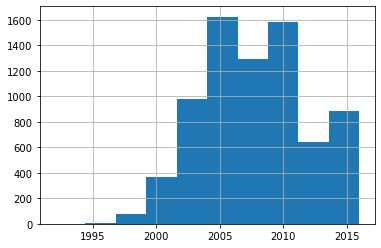

In [181]:
#how many games were released in different years

new_games = games.query('year_of_release > 1990')
new_games['year_of_release'].hist();

- Until 1990, few games were released.
- The largest number in the period from 2005 to 2010.
- By 2015, the number of games released was on the decline.

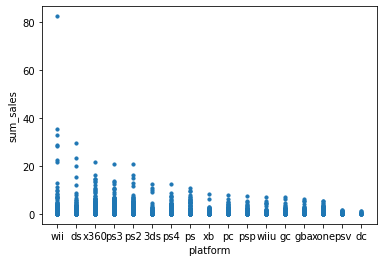

In [182]:
#how sales have changed by platform
 
games.plot.scatter(x = 'platform', y = 'sum_sales', s = 10);

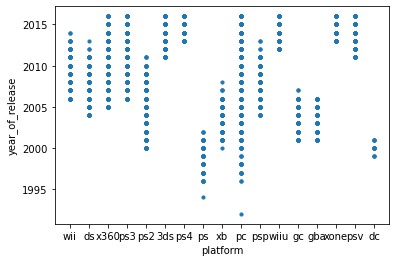

In [183]:
new_games.plot.scatter(x = 'platform', y = 'year_of_release', s = 10);

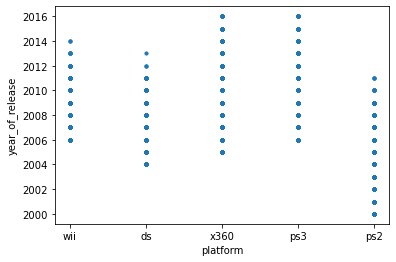

In [184]:
#select the platforms with the highest total sales and plot the distribution by year
#how long does it take for new platforms to appear and old platforms to disappear?

games.groupby('platform')['sum_sales'].sum().sort_values(ascending = False)

top_5_platform = new_games.query('platform == "ps2" | platform == "x360" | platform == "ps3" | platform == "wii" | platform == "ds"')

top_5_platform.plot.scatter(x = 'platform', y = 'year_of_release', s = 10);

- After 2005, new platforms appear with sales success.
- In 2010, the platform disappears, which for a long time (since 2000) had previously been successful on the market.
- On average, platforms remain on the market for about 10 years.

In [185]:
#take the data for the relevant current period
#determine the actual period yourself as a result of researching the previous questions
#the main factor is that this data will help build a forecast for 2017
#do not take into account data for previous years in your work

actual_games = games.query('2006 < year_of_release < 2016')

In [186]:
actual_games = actual_games.dropna(subset = ['critic_score'])

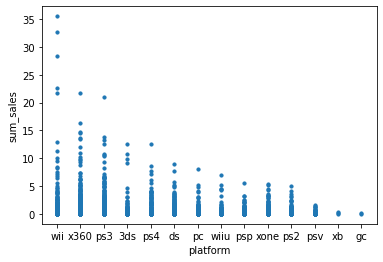

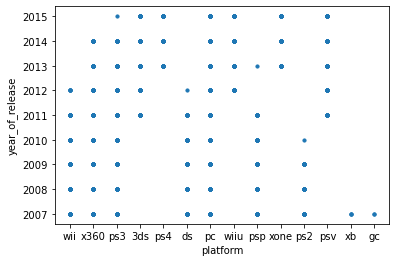

In [187]:
#what platforms are leading in terms of sales, growing or falling? 
#choose a few potentially profitable platforms

actual_games.plot.scatter(x = 'platform', y = 'sum_sales', s = 10);
actual_games.plot.scatter(x = 'platform', y = 'year_of_release', s = 10);

Between 2006 and 2016:
- the following platforms were in the lead in sales: **wii, x360, ps3**
- **ds** platform finished releasing new games in 2013
- **ps4** and **3ds** platforms were just gaining momentum.

Potentially profitable platforms were selected: **wii, x360, ps3, ps4, 3ds**.

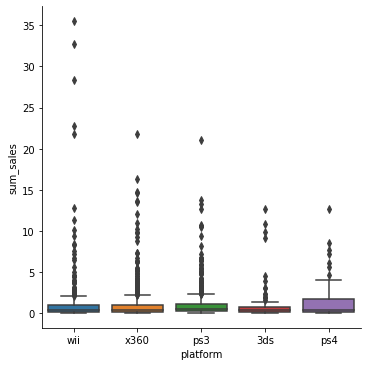

In [188]:
#plot a box and mustache graph of global game sales by platform
#describe the result

global_games = actual_games.query('platform == "wii" | platform == "x360" | platform == "ps3" | platform == "ps4" | platform == "3ds"')

sb.catplot(x = 'platform', y = 'sum_sales', kind = 'box', data = global_games, orient = 'v');

- The limits of normal values in the widest range are for the **ps4** platform.
- The rest of the platforms are characterized by higher emissions and a smaller range of reference values.

Correlation between user reviews and sales: 0.02
Correlation between critical reviews and sales: 0.43


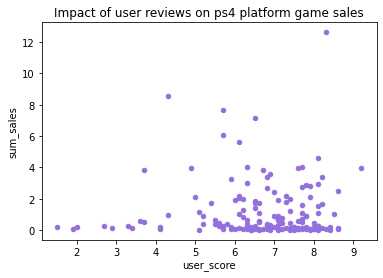

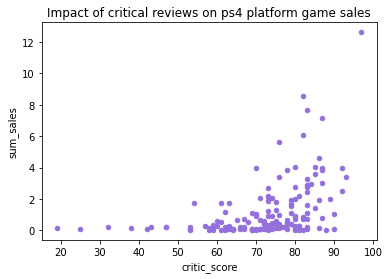

In [189]:
#see how user and critical reviews affect sales within one popular platform
#build a scatterplot and calculate the correlation between reviews and sales
#formulate your conclusions

ps4 = global_games.query('platform == "ps4"')

ps4.plot.scatter(x = 'user_score', y = 'sum_sales', 
                 c = 'mediumpurple', title = 'Impact of user reviews on ps4 platform game sales');
ps4.plot.scatter(x = 'critic_score', y = 'sum_sales', 
                 c = 'mediumpurple', title = 'Impact of critical reviews on ps4 platform game sales');

corr_sale_user_ps4 = ps4['user_score'].corr(ps4['sum_sales'])
print('Correlation between user reviews and sales:', corr_sale_user_ps4.round(2))

corr_sale_critic_ps4 = ps4['critic_score'].corr(ps4['sum_sales'])
print('Correlation between critical reviews and sales:', corr_sale_critic_ps4.round(2))

- There is a very weak positive correlation (**0.02**) between sales and user reviews. The highest revenue from sales is for games with reviews ranging from 4 to 6.
- The correlation between criterion reviews and sales is higher, but also remains weak (**0.43**). However, the highest sales are observed with a high rating from critics (from 80 to 100).

Correlation between wii user scores and sales: 0.14
Correlation between wii platform critic scores and sales: 0.23
_________________________________________________________________
Correlation between x360 user scores and sales: 0.11
Correlation between x360 platform critic scores and sales: 0.39
_________________________________________________________________


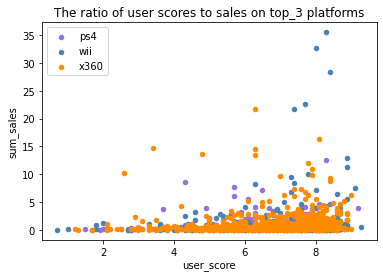

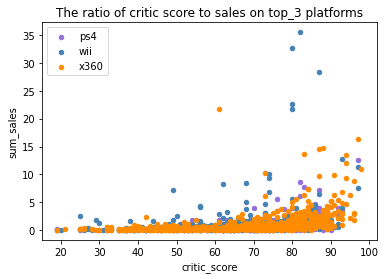

In [190]:
#the ratio of user scores to sales on top_3 platforms

wii = global_games.query('platform == "wii"')
x360 = global_games.query('platform == "x360"')

ax1 = ps4.plot(kind  = 'scatter',      
               x     = 'user_score', 
               y     = 'sum_sales', 
               color = 'mediumpurple', 
               label = 'ps4', 
               title = 'The ratio of user scores to sales on top_3 platforms')    

ax2 = wii.plot(kind  = 'scatter',      
               x     = 'user_score', 
               y     = 'sum_sales', 
               color = 'steelblue',    
               label = 'wii', 
               ax    = ax1)    

ax3 = x360.plot(kind = 'scatter',      
               x     = 'user_score', 
               y     = 'sum_sales', 
               color = 'darkorange',   
               label = 'x360', 
               ax    = ax1)

#the ratio of critic scores reviews to sales on top_3 platforms

ax4 = ps4.plot(kind  = 'scatter', 
               x     = 'critic_score', 
               y     = 'sum_sales', 
               color = 'mediumpurple',  
               label = 'ps4', 
               title ='The ratio of critic score to sales on top_3 platforms')    

ax5 = wii.plot(kind  = 'scatter', 
               x     = 'critic_score', 
               y     = 'sum_sales', 
               color = 'steelblue', 
               label = 'wii', 
               ax    = ax4)    

ax6 = x360.plot(kind = 'scatter', 
               x     = 'critic_score', 
               y     = 'sum_sales',  
               color = 'darkorange', 
               label = 'x360', 
               ax    = ax4)

corr_sale_user_wii    = wii['user_score'].corr(wii['sum_sales'])
print('Correlation between wii user scores and sales:', corr_sale_user_wii.round(2))

corr_sale_critic_wii  = wii['critic_score'].corr(wii['sum_sales'])
print('Correlation between wii platform critic scores and sales:', corr_sale_critic_wii.round(2))
print('_________________________________________________________________')

corr_sale_user_x360   = x360['user_score'].corr(x360['sum_sales'])
print('Correlation between x360 user scores and sales:', corr_sale_user_x360.round(2))

corr_sale_critic_x360 = x360['critic_score'].corr(x360['sum_sales'])
print('Correlation between x360 platform critic scores and sales:', corr_sale_critic_x360.round(2))
print('_________________________________________________________________')

- On the other two leading platforms in terms of sales (**wii** and **x360**), the correlation with user and critic scores is very weak.

Game revenue by genre


genre
action          778.65
shooter         559.60
sports          439.35
role-playing    294.81
misc            284.59
racing          211.01
platform        185.54
fighting        127.98
simulation      102.68
adventure        50.65
strategy         43.77
puzzle           40.38
Name: sum_sales, dtype: float64

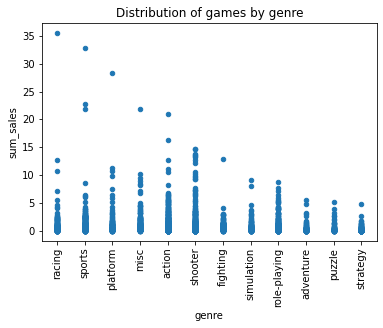

In [191]:
#look at the general distribution of games by genre
#what about the most profitable genres?
#do the high and low selling genres stand out?

actual_games.plot(kind  = 'scatter', 
                  x     = 'genre', 
                  y     = 'sum_sales', 
                  title = 'Distribution of games by genre');

plt.xticks(rotation = 90);

print('Game revenue by genre')
actual_games.groupby('genre')['sum_sales'].sum().sort_values(ascending = False)

- The most profitable genres are: **action, shooter, sports.**
- Then there are **misc** and **role-playing**.
- The lowest sales are for **puzzle, strategy, adventure**.

## Step 4. Create a portrait of the user of each region
Define for the user of each region (NA, EU, JP):
- The most popular platforms (top 5). Describe the differences in sales shares.
- The most popular genres (top-5). Explain the difference.
- Does the ESRB rating affect sales in a particular region?

In [192]:
#define for the user of each region (NA, EU, JP):
#the most popular platforms (top 5)

top_5_na_platform = actual_games.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()
top_5_eu_platform = actual_games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()
top_5_jp_platform = actual_games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()

print('Top 5 platforms in the North American region')
print(top_5_na_platform)
print('_____________________________________________')
print('Top 5 platforms in the European region')
print(top_5_eu_platform)
print('_____________________________________________')
print('Top 5 platforms in Japan region')
print(top_5_jp_platform)

#describe the differences in sales shares

na_sum = games['na_sales'].sum()
eu_sum = games['eu_sales'].sum()
jp_sum = games['jp_sales'].sum()

total_sum = na_sum + eu_sum + jp_sum

part_na = na_sum / total_sum
part_eu = eu_sum / total_sum
part_jp = jp_sum / total_sum

print('_____________________________________________')
print('Share of sales of the North American region:', part_na.round(2))
print('Share of sales of the European region:', part_eu.round(2))
print('Share of sales of the Japan region:', part_jp.round(2))

Top 5 platforms in the North American region
platform
x360    493.48
ps3     333.41
wii     273.74
ds      104.85
ps4      66.20
Name: na_sales, dtype: float64
_____________________________________________
Top 5 platforms in the European region
platform
ps3     267.15
x360    224.28
wii     160.55
ps4      84.74
pc       82.60
Name: eu_sales, dtype: float64
_____________________________________________
Top 5 platforms in Japan region
platform
ps3    53.91
wii    43.75
ds     40.28
3ds    32.91
psp    20.56
Name: jp_sales, dtype: float64
_____________________________________________
Share of sales of the North American region: 0.57
Share of sales of the European region: 0.34
Share of sales of the Japan region: 0.09


- Common to all regions and included in the top 5 are **wii, ps3** platforms.
- The North American and the European region also have the **x360** and **ps4** platforms in common from the top 5 for them, with the Japanese - **ds** platform.
- The share of sales in the Japanese region is very small, the largest share is in the North American region, the European one is in the middle position.

In [193]:
#the most popular genres (top-5)
#explain the difference

top_5_na_genre = actual_games.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()
top_5_eu_genre = actual_games.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()
top_5_jp_genre = actual_games.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()

print('Top 5 genres of the North American region')
print(top_5_na_genre)
print('_____________________________________________')
print('Top 5 genres of the European region')
print(top_5_eu_genre)
print('_____________________________________________')
print('Top 5 genres of the Japan region')
print(top_5_jp_genre)

Top 5 genres of the North American region
genre
action          372.24
shooter         294.19
sports          226.75
misc            159.84
role-playing    130.19
Name: na_sales, dtype: float64
_____________________________________________
Top 5 genres of the European region
genre
action     263.08
shooter    186.43
sports     138.45
racing      85.63
misc        79.60
Name: eu_sales, dtype: float64
_____________________________________________
Top 5 genres of the Japan region
genre
role-playing    64.22
action          44.15
platform        22.53
sports          19.18
misc            16.70
Name: jp_sales, dtype: float64


- The top 5 genres of the North American and European regions are completely similar in content, only the fourth and fifth positions differ.
- Among the top 5 genres of different regions, Japanese stands out. In the first place is the **role-playing** genre, and in the third place is **platform**, which are not even in the top 5 of the North American and European regions. The other 3 genres are similar to the top 5 in the other two regions.

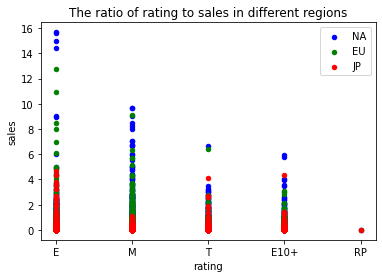

In [194]:
#rating:
#E - everyone
#M - mature 17+
#T - teen
#E10+ - everyone 10+
#K-A - kids to adults
#AO - adults only 18+
#EC - early childhood
#RP - rating pending

#does the ESRB rating affect sales in a particular region?

actual_games = actual_games[actual_games.rating.notnull()]
 
na_rat = actual_games.plot(kind  = 'scatter', 
                    x     = 'rating', 
                    y     = 'na_sales', 
                    color = 'b', 
                    label = 'NA', 
                    title = 'The ratio of rating to sales in different regions')

eu_rat = actual_games.plot(kind  = 'scatter', 
                    x     = 'rating', 
                    y     = 'eu_sales', 
                    color = 'g', 
                    label = 'EU', 
                    ax    = na_rat)  

jp_rat = actual_games.plot(kind  = 'scatter', 
                    x     = 'rating', 
                    y     = 'jp_sales', 
                    color = 'r', 
                    label = 'JP', 
                    ax    = na_rat)

na_rat.set_ylabel('sales');

- Sales of games rated **M (mature 17+)** in the Japanese region are significantly lower, there is also a gap and differences in the number of games rated **E10+ (everyone 10+)** in this region.

## Step 5. Test hypotheses
- Average user ratings for Xbox One and PC platforms are the same;
- The average user ratings of the Action and Sports genres are different.

Explain:
- How did you formulate the null and alternative hypotheses;
- What criterion was used to test hypotheses and why.

In [215]:
#Null hypothesis:
#average user ratings for Xbox One and PC platforms are the same

#Alternative hypothesis (two-sided):
#average user ratings for Xbox One and PC platforms are not equal

alpha = 0.05 #critical level of statistical significance

xone = actual_games.loc[actual_games['platform'].eq('xone'), 'user_score']

pc = actual_games.loc[actual_games['platform'].eq('pc'), 'user_score']

res_x_pc = st.ttest_ind(a=xone, b=pc)
print('p-value:', res_x_pc.pvalue)

if res_x_pc.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value: 0.02384426494561727
Rejecting the null hypothesis


In [216]:
#Null hypothesis:
#average user ratings of genres Action and Sports are different

#Alternative hypothesis (two-sided):
#average user ratings of genres Action and Sports are the same

action = actual_games.loc[actual_games['genre'].eq('action'), 'user_score']

sports = actual_games.loc[actual_games['genre'].eq('sports'), 'user_score']

res_act_sp = st.ttest_ind(a=action, b=sports)
print('p-value:', res.pvalue)

if res_act_sp.pvalue < alpha:
    print('Failed to reject the null hypothesis')
else:
    print('Rejecting the null hypothesis')

p-value: 1.1473652714671744e-06
Failed to reject the null hypothesis


## Step 6. General conclusion

The following regularities have been identified that determine the success of the game:
- Most games were released between 2004 and 2006 and from 2009 to 2011.
- The most popular selling games platforms are **wii, ds, x360, ps3 and ps2**.
- On average, 1 platform remains in demand on the market and continues to release games for 8-10 years.
- Based on data analysis for the period from 2006 to 2016. Potentially profitable platforms selected: **wii, x360, ps3, ps4, 3ds.**
- User reviews and critics have little or no effect on game sales.
- The most profitable genres of games are: **action, shooter, sports.**
- Lowest sales for **puzzle, strategy, adventure.**
- Common to all regions (NA, EU, JP) and included in the top 5 are **wii and ps3** platforms.
- Common to all regions (NA, EU, JP) and included in the top 5 genres are **action, sports, misc**.
- Sales of **M** rated games in the Japanese region are significantly lower, and there is also a gap and difference in the number of sales of **E10+** rated games in this region compared to the other two regions.
- Average user ratings for **Xbox One** and **PC** platforms are the same.
- Average user ratings for **Action** and **Sports** genres are the same.